## Problem Definition

In platforms like last.fm, users generally add tags to make the song get seen by those who wish listening them. Some users find what they will listen with these tags which includes information about the genres. Although, there are many missing tags which lead users spend more time finding what to listen. For this problem, we want you to implement machine learning algorithms to improve data quality of the last.fm, and the user experience. 

<b>Your task is here, classifiying  whether given song's genre is progressive rock or pop by its lyrics.</b><p>That project is different than other classification-based projects. So, after you complete that assignment; you will be able to comprehend many basic concepts of Natural Language Processing.</p>

#### **The homework is due Sunday, October 17 midnight.** 

## Import Libraries

Main Libraries for you to deploy your model (Feel free to use other libraries that you think helpful):  
<li><a href = 'https://pandas.pydata.org/'>
Pandas
</a></li> 
<li><a href = 'https://numpy.org/'>
Numpy
</a></li> 
<li><a href = 'https://scikit-learn.org/'>
Sklearn 
</a></li> 
<li><a href = 'https://docs.python.org/3/library/re.html'>
re
</a></li> 
<li><a href = 'https://www.nltk.org/'>
nltk
</a></li> 
<li><a href = 'https://amueller.github.io/word_cloud/'>
WordCloud 
</a></li>



In [1]:
import pandas as pd
import re 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Import Data

Use <a href = 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html'>
pandas.read_excel()
</a>
function for importing your excel file.

In [2]:
### Code here (Write 1 line code to import your data as excel file)
data =pd.read_excel(r"C:\Users\PC\Desktop\DATA\Homework_2_Classification\selected_songs.xlsx")
data.head()

,genre,lyrics,Artist,Song
0,prog,"I am just a new boy,\nStranger in this town.,\...",Pink Floyd,Young Lust Lyrics
1,prog,"Eins, zwei, drei, alle!,Ooooh You cannot reach...",Pink Floyd,Waiting For The Worms Lyrics
2,prog,"All alone, or in twos,\nThe ones who really lo...",Pink Floyd,Outside The Wall Lyrics
3,prog,"Into the distance a ribbon of black,\nStretche...",Pink Floyd,Learning To Fly Lyrics
4,prog,"You got to be crazy, gotta have a real need,\n...",Pink Floyd,Dogs Lyrics


## PART I : Data Preprocessing

<a href="https://www.edupristine.com/blog/text-mining-overview">Here </a> is a brief blogpost about text mining steps and terminology used below.If you want more detail about text mining and nltk library in Python, this <a href="https://www.youtube.com/watch?v=05ONoGfmKvA">video</a> could help. 


### 1-) Removing Numbers, Punctuations and Lower the Words

In [3]:
# Please run the code
def rid_of_specials(words):
    new= ''
    for i in range(len(words)):
        a = re.sub('[^A-Za-z]+', ' ', words[i]).lower()
        new += a
    return new

#### a.Apply <b>rid_of_specials</b> to lyrics column in your dataset.


In [4]:
data['lyrics'] = data.lyrics.apply(rid_of_specials) ## Code here ~~ Complete 1 line code to perform rid_of_specials on lyrics column in your dataset.
data.head()

,genre,lyrics,Artist,Song
0,prog,i am just a new boy stranger in this town w...,Pink Floyd,Young Lust Lyrics
1,prog,eins zwei drei alle ooooh you cannot reach...,Pink Floyd,Waiting For The Worms Lyrics
2,prog,all alone or in twos the ones who really lov...,Pink Floyd,Outside The Wall Lyrics
3,prog,into the distance a ribbon of black stretched...,Pink Floyd,Learning To Fly Lyrics
4,prog,you got to be crazy gotta have a real need g...,Pink Floyd,Dogs Lyrics


#### b.Explain what above code cell does step by step and why you run it. 

*rid_of_specials* function takes *word* variable as a parameter. Reaches this *string* parameter's every char via for loop. With the help of *regex* checks every char whether or not a punctuation mark if so deletes the char and with *.lower()* turns it to lowercase.

We used *apply()* function for *rid_of_specials*. "apply() applies the function it takes as parameter to every element of the specified columns.<br><br>
<b>More İnfo</b><br>
Regex= https://www.w3schools.com/python/python_regex.asp<br>
.apply =https://www.w3schools.com/python/python_regex.asp

### 2-) Tokenize

In [5]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

tokenized=[word_tokenize(i) for i in data['lyrics']]
tokenized[0]

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['i',
 'am',
 'just',
 'a',
 'new',
 'boy',
 'stranger',
 'in',
 'this',
 'town',
 'where',
 'are',
 'all',
 'the',
 'good',
 'times',
 'who',
 's',
 'gon',
 'na',
 'show',
 'this',
 'stranger',
 'around',
 'ooooh',
 'i',
 'need',
 'a',
 'dirty',
 'woman',
 'ooooh',
 'i',
 'need',
 'a',
 'dirty',
 'girl',
 'will',
 'some',
 'woman',
 'in',
 'this',
 'desert',
 'land',
 'make',
 'me',
 'feel',
 'like',
 'a',
 'real',
 'man',
 'take',
 'this',
 'rock',
 'and',
 'roll',
 'refugee',
 'oooh',
 'babe',
 'set',
 'me',
 'free',
 'ooooh',
 'i',
 'need',
 'a',
 'dirty',
 'woman',
 'ooooh',
 'i',
 'need',
 'a',
 'dirty',
 'girl',
 'ooooh',
 'i',
 'need',
 'a',
 'dirty',
 'woman',
 'ooooh',
 'i',
 'need',
 'a',
 'dirty',
 'girl']

### 3-) Removing Stopwords

In [6]:
# Please run the code
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#Step 1
stop_words = set(stopwords.words('english'))
#Step 2
stopped = [[i for i in j if i not in stop_words] for j in tokenized]


stopped[0]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['new',
 'boy',
 'stranger',
 'town',
 'good',
 'times',
 'gon',
 'na',
 'show',
 'stranger',
 'around',
 'ooooh',
 'need',
 'dirty',
 'woman',
 'ooooh',
 'need',
 'dirty',
 'girl',
 'woman',
 'desert',
 'land',
 'make',
 'feel',
 'like',
 'real',
 'man',
 'take',
 'rock',
 'roll',
 'refugee',
 'oooh',
 'babe',
 'set',
 'free',
 'ooooh',
 'need',
 'dirty',
 'woman',
 'ooooh',
 'need',
 'dirty',
 'girl',
 'ooooh',
 'need',
 'dirty',
 'woman',
 'ooooh',
 'need',
 'dirty',
 'girl']

#### a.Explain what above code cell does step by step and why you run it. 

Stop words are uneffective words to the general meaning of the sentence such as "*I*" "*am*" "*the*".

Since these words does not effect the meaning they can effect and misdirect algorithms. Also brings disagvantages like data growth and algorithm speed.

In order to have a better/cleaner data we have to **get rid of them**.

* *First we download the data and transform to set.
* We are looping in the tokenized words.
* IF the *stopword* does not inclued the tokenized word and we simply add it.

### 4-) Lemmatization

In [7]:
# Please run the code
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
# Step 1
lemmatizer = WordNetLemmatizer()
# Step 2
lemmatized = [[lemmatizer.lemmatize(i) for i in j] for j in stopped]
# Step 3
prepeared_sentence= [' '.join(j) for j in lemmatized]
data['Lyrics_Processed'] = prepeared_sentence
print(data.Lyrics_Processed)
print(data.lyrics[0])

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0      new boy stranger town good time gon na show st...
1      eins zwei drei alle ooooh reach ooooh matter t...
2      alone two one really love walk outside wall ha...
3      distance ribbon black stretched point turning ...
4      got crazy got ta real need got sleep toe stree...
                             ...                        
825    know want try evertime see remember fell love ...
826    girl close eye let rhythm get try fight nothin...
827    help done many time hurt today worst part one ...
828    yeah rihanna good girl gone bad take three act...
829    work work work work work work said haffi work ...
Name: Lyrics_Processed, Length: 830, dtype: object
i am just a new boy  stranger in this town   where are all the good times   who s gonna show this stranger around  ooooh  i need a dirty woman  ooooh  i need a dirty girl   will some woman in this desert land  make me feel like a real man   take this rock and roll refugee oooh  babe set me free   ooooh  i need a dirty wo

#### a.Explain what above code cell does step by step and why you run it. 

* First we define a lemmatizer.
* With *lemmatizer* we lemmatize every word of the sentences which we created in the previous section with stopwords.
* We store them in nested list as every sentence's words will be in an another list from other sentences.
* Finally with *join()* joining them together to be sentences again and append to a new column.


#### b.Explain why lemmatization is used for.

 Lemmatization is a word simplification method. This method helps words purify from unnecessary **--additions--** and simplify.
 for example:apples-apple.
 
 
 Without this method we will be seeing *apple* and *apples* as different vectors. This would make our data very hard to work with since data will not be too realible and it's size will be unnecessarily big.
 <img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1539984207/stemminglemmatization_n8bmou.jpg" />
 

#### c. Which method can be used instead of Lemmatization method and explain differences.

There is two different method for word simplification *Lemmatization* and *Steming*. Main difference of these methods is while *lemmatization* considering words morphological meanings to simplify, *Steming* does not do that. Since *Steming* does not do that it may cause some problems such as counting two words with the same word root but different meanings. Stemming is far from perfect, but can be applied more easily than Lemmazitation.
<img src="https://studymachinelearning.com/wp-content/uploads/2019/09/stemmin_lemm_ex-1.png" >


 ### 5-) Vectorization

In [8]:
# Please run the code
from sklearn.feature_extraction.text import CountVectorizer
#Step 1
vectorizer = CountVectorizer()
#Step 2
X = vectorizer.fit_transform(prepeared_sentence)
#Step 3
feature_names = vectorizer.get_feature_names()
#Step 4
lyrics_vectorized = pd.DataFrame(X.toarray(), columns = feature_names)
lyrics_vectorized.head()

C:\Users\PC\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaaaaaaah,aaaaaaaah,aaaah,aaah,aah,aahh,aaow,abandon,...,zen,zeus,zig,zip,zombie,zone,zoning,zoo,zwei,zy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### a.Explain what above code cell does step by step and why you run it. 

After defining *CountVectorizer* we give the *prepeared_sentence* variable which we created in the previous code block as a parameter to *vectorizer.fit_transform*.Thus we defined every word in sentences as a column and we shaped it according to whether it is in the sentence or not as 1 or 0. In this way, our data gained meaning for a computer.
<img src="https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1539984207/stemminglemmatization_n8bmou.jpg"> 

#### b.Explain why countvectorizer is used for.

As mentioned in **option A**  string data must be transformed into a numerical format to makes sense to a computer algorithm. Considering that there are over 8000 words in the dataset, it can be said that vectorizing would be a better decision.
<img src = "https://www.researchgate.net/profile/Muhammad-Yaseen-Khan/publication/354354484/figure/fig2/AS:1080214163595268@1634554534648/Illustration-of-count-vectorization.jpg">

#### c. Google "TF-IDF Vectorization". Briefly explain the differences from Count Vectorazation.


**TF(term frequency)**=the frequency of the word in the document.<br>
**DF(document frequency)** = It is found by dividing the number of documents by the number of documents in which the relevant word occurs.<br>
**IDF(inverse document frequency)**= Calculated by log(df). <br>
**TF-IDF**= Calculated by performing the TF*IDF operation. <br>
<b>TF-IDF's general meaning</b> : The number that incidates how relevant a certain word to a certain document.In other words, it is a mathematical indicator of how much a word represents that document.

source: <li>https://mdurmuss.github.io/tf-idf-nedir/</li>
        <li>https://dergipark.org.tr/tr/download/article-file/940060</li>


### 6-) Target Preperation

Run cells below,

In [9]:
data.genre

0      prog
1      prog
2      prog
3      prog
4      prog
       ... 
825     pop
826     pop
827     pop
828     pop
829     pop
Name: genre, Length: 830, dtype: object

In [10]:
y = data.genre.map({'prog':1,'pop':0})
y

0      1
1      1
2      1
3      1
4      1
      ..
825    0
826    0
827    0
828    0
829    0
Name: genre, Length: 830, dtype: int64


data.genre=y.values
data.head()

Variable y is a single line target preperation step seen above. By looking at that output y, rewrite that target creation step
by using <a href = 'https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>
OneHotEnconder()</a> 
 function.


In [11]:
## Code here
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(sparse=False)
genres=data.genre.values
genres = genres.reshape(len(genres), 1)
onehot_encoded = onehot_encoder.fit_transform(genres)
print(onehot_encoded)


[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## PART II : Exploratory Data Analysis 

Please, perform exploratory data analysis and share your findings. This <a href="https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools">link </a> can be useful.

## Word Number

In [12]:
def get_word_number(sentence):
    words= sentence.split(' ')
    return len(words)
def get_unique_word_number(sentence):
    words= sentence.split(' ')

    duplicates = []

    for i in words:
        if i not in duplicates:
            duplicates.append(i)
    return len(duplicates)

In [13]:

data["word_number_lyrics"]=data.Lyrics_Processed.apply(get_word_number)
data["unique_word_number"]=data.Lyrics_Processed.apply(get_unique_word_number)
data.head()

,genre,lyrics,Artist,Song,Lyrics_Processed,word_number_lyrics,unique_word_number
0,prog,i am just a new boy stranger in this town w...,Pink Floyd,Young Lust Lyrics,new boy stranger town good time gon na show st...,51,30
1,prog,eins zwei drei alle ooooh you cannot reach...,Pink Floyd,Waiting For The Worms Lyrics,eins zwei drei alle ooooh reach ooooh matter t...,150,103
2,prog,all alone or in twos the ones who really lov...,Pink Floyd,Outside The Wall Lyrics,alone two one really love walk outside wall ha...,27,24
3,prog,into the distance a ribbon of black stretched...,Pink Floyd,Learning To Fly Lyrics,distance ribbon black stretched point turning ...,111,86
4,prog,you got to be crazy gotta have a real need g...,Pink Floyd,Dogs Lyrics,got crazy got ta real need got sleep toe stree...,182,142



<font size="4">  the ratio of how many types of words are used to the entire song lyrics and  average word length </font>


In [14]:
data["mean_char_per_words"]= data.Lyrics_Processed.str.len()/data.word_number_lyrics
data["mean_uniq_per_words"]= data.unique_word_number/data.word_number_lyrics

<font size="4">It seems obvious that the number of words in the lyrics of pop songs is <font color="red">more than</font> the progs type.Therefore, this data we extract can help us in classification.</font>


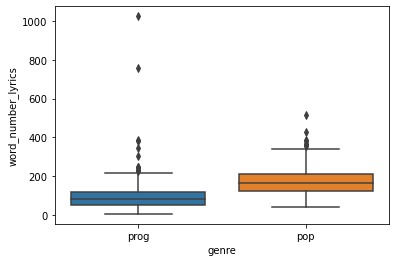

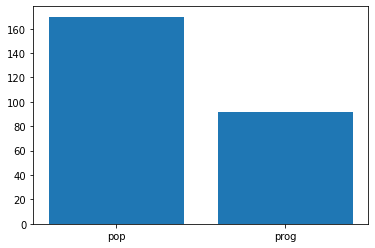

In [15]:
sns.boxplot(x="genre" ,y="word_number_lyrics", data=data)
plt.show()
plt.bar(x=data.groupby("genre").mean().index ,height=data.groupby("genre").mean().word_number_lyrics)
plt.show()

##  Comparision

In [16]:
df_pop=data[data.genre=="pop"]
df_prog=data[data.genre=="prog"]

In [17]:
data.groupby("genre").mean()

,word_number_lyrics,unique_word_number,mean_char_per_words,mean_uniq_per_words
genre,,,,
pop,169.800959,61.707434,5.608363,0.394608
prog,91.418886,59.767554,6.148404,0.701492


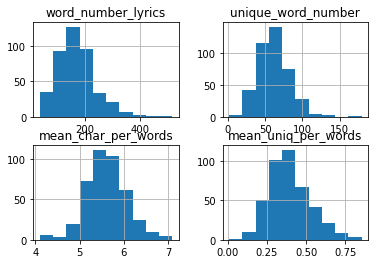

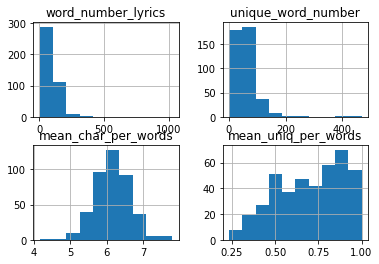

In [18]:
data.groupby("genre").hist()
plt.show()

In [19]:
#pip install wordcloud

<font size="4">it is clearly evident that the distribution of pop music is diverging </font>

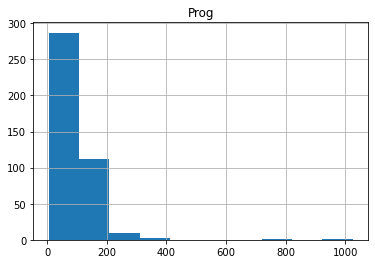

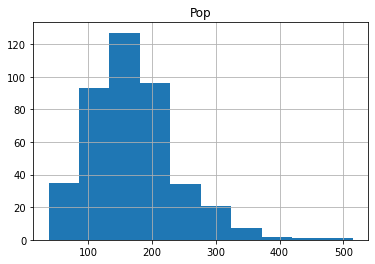

In [20]:
df_prog["word_number_lyrics"].hist()
plt.title("Prog")
plt.show()
df_pop["word_number_lyrics"].hist()
plt.title("Pop")
plt.show()

### Word Clouds

In [21]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()



<font size="4"> Music genres differ from each other in terms of lyrics, we can even encounter German words in prog music. </font>

Pop Word Cloud


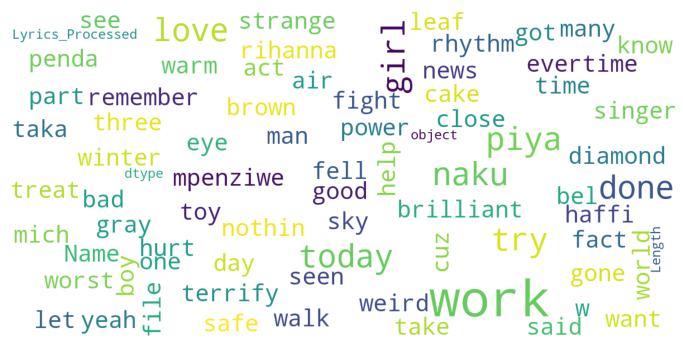

Prog Word Cloud


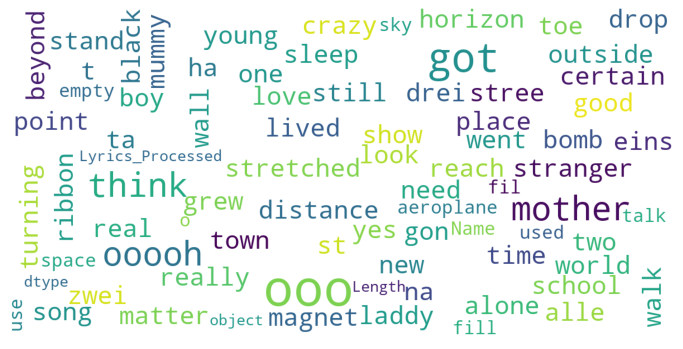

General Word Cloud


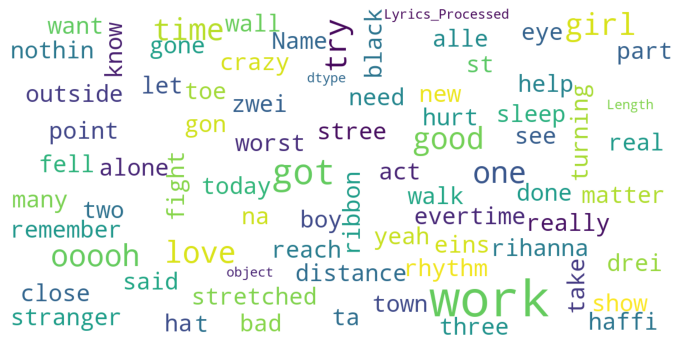

In [22]:
print("Pop Word Cloud")
show_wordcloud(df_pop.Lyrics_Processed)
print("Prog Word Cloud")
show_wordcloud(df_prog.Lyrics_Processed)
print("General Word Cloud")
show_wordcloud(data.Lyrics_Processed)


<font size="4"> An indication that musical genres also diverge as themes </font>


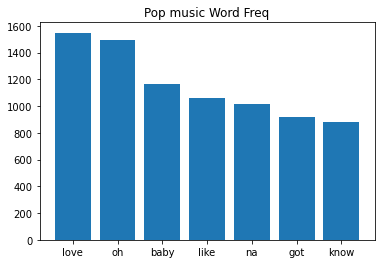

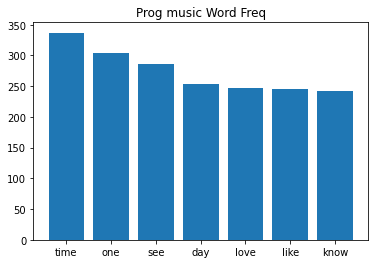

In [23]:
from collections import Counter
most_common_pop=dict(Counter(" ".join(df_pop["Lyrics_Processed"]).split()).most_common(7))
most_common_prog=dict(Counter(" ".join(df_prog["Lyrics_Processed"]).split()).most_common(7))
plt.bar( x=most_common_pop.keys(),height=most_common_pop.values())
plt.title("Pop music Word Freq")
plt.show()
plt.bar( x=most_common_prog.keys(),height=most_common_prog.values())
plt.title("Prog music Word Freq")
plt.show()


## PART III : Feature Creation & Selection

### 1-) Try creating additional features for your models and justify them by explaining. (Optional)

As can be seen from the tables, the number of words in the lyrics can play an important role in the separation of pop and prog music genres, so we can add these data. In addition, even though the number of pop music words is high, as shown in the tables, the number of unique words is proportionally small, which can play an important role in classification.

In [24]:
df=pd.concat([data,lyrics_vectorized],axis=1)
df.genre=y


df.drop(columns=["lyrics","Artist","Song","Lyrics_Processed","unique_word_number"],inplace=True)

### 2-) Select or eliminate redundant features.

#### a. In theory, the more feauture you can get more accuracy unless there is no noise in your data. In real life, we decrease number of feature for a price of accuracy. Think about it and justify the argument.

Although it is thought that more features will always affect the accuracy rate in a good way, it can also have bad effects on both the accuracy rate and the running speed of the algorithm.From the point of view of accuracy, highly correlated or ineffective features can increase the bias of the model and cause overfitting. Apart from that, as the data grows, these unnecessary features will adversely affect the running speed and ram consumption of our algorithm.

Ways to avoid this are to remove highly correlated features, Lasso Reg. and apply Ridge Reg. Below we will extract the highly correlated and ineffective features via the Heatmap.


#### b. Perform feature selection/elimination and show your codes.

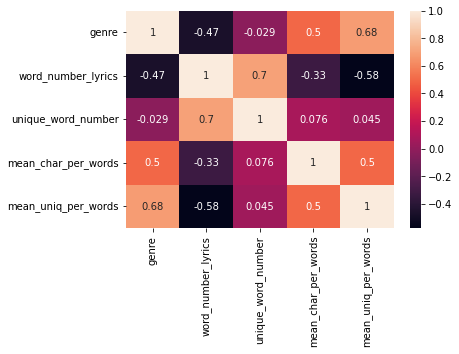

In [25]:
corr=df.loc[:,["genre","word_number_lyrics",'unique_word_number','mean_char_per_words', 'mean_uniq_per_words']].corr()
sns.heatmap(corr,annot=True)
plt.show()

As seen above, columns **genre** and **unique_word_number** almost **do not affect** each other, so they can be **removed** from the dataframe. This will give us an advantage **in terms of speed**. In addition, **unique_word_number** and **word_number_lyrics** are **highly correlated** with each other, and removing one of them will **reduce the bias of our algorithm so it prevents overfitting**. In addition to these, **String values** can also be removed because **vectorization** is performed. Finally, **the artist column will be removed as there are guesses from the lyrics requested from us.**

In [26]:
df.drop(columns=["lyrics","Artist","Song","Lyrics_Processed","unique_word_number","word_number_lyrics"],inplace=True)

## PART IV : Train - Test Splitting

###### After you complete all pre steps, now it is time to split your data into train and test parts.

On that stage, you need to write sequencial code blocks to split your train and test sets. Justify your approach briefly.

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df = pd.DataFrame(np_scaled, columns = df.columns.values)


X=df.drop(columns=["genre"])
y=df.genre
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)
X_train.head()

,mean_char_per_words,mean_uniq_per_words,aa,aaa,aaaaaaaaah,aaaaaaaah,aaaah,aaah,aah,aahh,...,zen,zeus,zig,zip,zombie,zone,zoning,zoo,zwei,zy
264,0.613515,0.875645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
545,0.303854,0.414328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,0.420362,0.282907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,0.570722,0.560937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
299,0.598879,0.787651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## PART V : Modelling

Perform each algorithm below the list (Feel free if you want use additional algorithm):
<li>Naive Bayes</li>
<li>Decision Trees</li>
<li>Random Forest</li>
<li>GBM</li>

Please, show us how you tune them.

#### 1-) Naive Bayes

The Naïve Bayes Classifier belongs to the family of probability classifier, using <b>Bayesian theorem</b>.
(https://towardsdatascience.com/introduction-to-na%C3%AFve-bayes-classifier-fa59e3e24aaf)

<img src="https://miro.medium.com/max/828/1*39U1Ln3tSdFqsfQy6ndxOA.png" >

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
y_pred_naive = gnb.fit(X_train, y_train).predict(X_test)
y_pred_tr_naive=gnb.predict(X_train)


#### 2-) Decision Trees


Decision Tree is <b>the most powerful and popular tool for classification and prediction</b>. A Decision tree is a flowchart-like<b>tree structure</b>, where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label.  (https://www.geeksforgeeks.org/decision-tree/)


<img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/Decision_Tree-2.png">

In [29]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)


dt_grid_search_params = {'min_samples_leaf' : ["l1"’, "l2", "elasticnet", "none"],
                         'criterion' : ['gini','entropy'],
                        }

dt_grid_search=GridSearchCV(dt, dt_grid_search_params, scoring='accuracy',cv=5, n_jobs=4, verbose=3, refit = True)

dt_result = dt_grid_search.fit(X_train, y_train)

y_pred_dt = dt.fit(X_train, y_train).predict(X_test)
y_pred_train_dt=dt.predict(X_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [ ]:

dt_grid_search_params = {'penalty' : [1,2,5],
                         'criterion' : ['gini', 'entropy'],
                        }


In [30]:
print(dt_result.best_score_)
y_pred_dt=dt_result.predict(X_test)
y_pred_train_dt=dt_result.predict(X_train)

0.8506917631917632


#### 3-) Random Forest

Random forests or random decision forests is an <b> ensemble learning method </b>for classification, regression and other tasks that operates by constructing a <b>multitude of decision trees at training time</b>. 

<img src="https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png">

In [31]:
from sklearn.ensemble import RandomForestClassifier

rf_grid_search_params = {'min_samples_leaf' : [1,2,5],
                         'min_samples_split' : [5,10],
                         'max_depth' : [3],
                         'n_estimators' : [80,100,120],
                         'criterion' : ['gini', 'entropy'],
                         'bootstrap' : [True, False]
                        }

rf = RandomForestClassifier(max_depth=3, random_state=0)

rf_grid_search=GridSearchCV(rf, rf_grid_search_params, scoring='accuracy',cv=5, n_jobs=4, verbose=3, refit = True)


rf_result = rf_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [32]:
rf_result.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [33]:
print(rf_result.best_score_)
y_pred_rf=rf_result.predict(X_test)
y_tr_pred_rf=rf_result.predict(X_train)

0.884877734877735


#### 4-) GBM


<img src="https://user-images.githubusercontent.com/45563371/89561372-fb172900-d84a-11ea-8127-5e1c06c69044.png" />

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,    max_depth=1, random_state=0).fit(X_train, y_train)
y_pred_gbm= gbm.fit(X_train, y_train).predict(X_test)
y_pred_tr_gbm=gbm.predict(X_train)
cf_matrix = confusion_matrix(y_test, y_pred_gbm)
cf_matrix

array([[126,   9],
       [ 16, 123]], dtype=int64)

### PART VI : Model Evaluation

Evaluate your models by using F1 Score and Accuracy Score. Additionally, plot Confusion Matrix and ROC curve. Compare algorithm results in terms of these metrics and comment them.

## F1 Scores and Accuracy Score


<img src="https://forums.fast.ai/uploads/default/original/3X/c/c/cca1b3ad72fc927fbf3d3690f01d2e3b5a31dd2e.png" >

In [35]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


### 1-) Navie Bayes

In [36]:
f1=f1_score(y_test,y_pred_naive)
print("f1_score",f1)
acc=accuracy_score(y_test,y_pred_naive)
print("accuracy_score",acc)


f1_score 0.7702702702702702
accuracy_score 0.7518248175182481


In [37]:
f1=f1_score(y_train,y_pred_tr_naive)
print("f1_score train ",f1)
acc=accuracy_score(y_train,y_pred_tr_naive)
print("accuracy_score train",acc)


f1_score train  0.9926470588235294
accuracy_score train 0.9928057553956835



### 2-) Decision Tree

In [38]:
f1=f1_score(y_test,y_pred_dt)
print("f1_score",f1)
acc=accuracy_score(y_test,y_pred_dt)
print("accuracy_score",acc)

f1_score 0.8864468864468865
accuracy_score 0.8868613138686131


In [39]:
f1=f1_score(y_train,y_pred_train_dt)
print("f1_score train",f1)
acc=accuracy_score(y_train,y_pred_train_dt)
print("accuracy_score train",acc)

f1_score train 1.0
accuracy_score train 1.0


### 3-) Random Forest

In [40]:

f1=f1_score(y_test,y_pred_rf)
print("f1_score",f1)
acc=accuracy_score(y_test,y_pred_rf)
print("accuracy_score",acc)

f1_score 0.920863309352518
accuracy_score 0.9197080291970803


In [41]:

f1=f1_score(y_train,y_tr_pred_rf)
print("f1_score train",f1)
acc=accuracy_score(y_train,y_tr_pred_rf)
print("accuracy_score train",acc)

f1_score train 0.9261261261261261
accuracy_score train 0.9262589928057554


### 4-) GBM 

In [42]:
f1=f1_score(y_test,y_pred_gbm)
print("f1_score",f1)
acc=accuracy_score(y_test,y_pred_gbm)
print("accuracy_score",acc)

f1_score 0.9077490774907749
accuracy_score 0.9087591240875912


In [43]:
f1=f1_score(y_train,y_pred_tr_gbm)
print("f1_score train",f1)
acc=accuracy_score(y_train,y_pred_tr_gbm)
print("accuracy_score train ",acc)

f1_score train 1.0
accuracy_score train  1.0


<font size="4">The best is Random Forest according to F1 and accuracy scores.<font color="red" >It seems that other Algorithms are facing overfitting problem </font> </font>


## Roc Curve

In [44]:
import sklearn.metrics as metrics

def plot_curve(y_test,y_pred):
    
    fpr, tpr, threshold = metrics.roc_curve(y_test,y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


### 1-) Navie Bayes

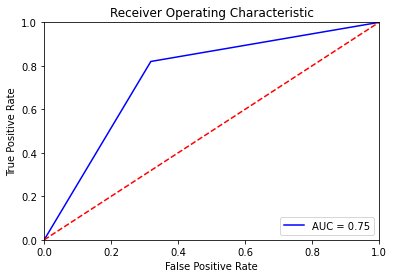

In [45]:
plot_curve(y_test,y_pred_naive)

### 2-) Decision Tree

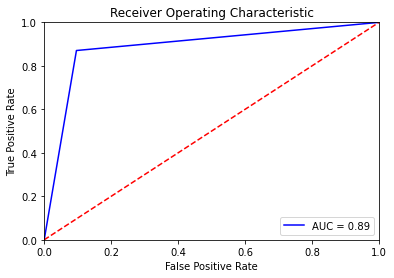

In [46]:
plot_curve(y_test,y_pred_dt)

### 3-) Random Forest

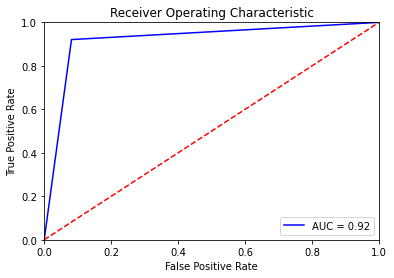

In [47]:
plot_curve(y_test,y_pred_rf)

### 4-) GBM 

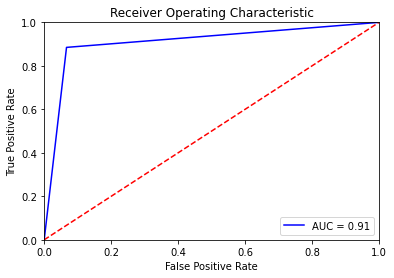

In [48]:
plot_curve(y_test,y_pred_gbm)

<font>The Random Forest Algorithm is better than this metric because the closer the<font color="red"> AUC value is to 1, the better.<font><font>

## Confusion Matrix

In [49]:
def plot_confusion_matrix(y_test,y_pred):
    cf_matrix = confusion_matrix(y_test, y_pred)
    ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues' )

    ax.set_title('Seaborn Confusion Matrix with labels\n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    ## Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['Pop','prog'])
    ax.yaxis.set_ticklabels(['Pop','prog'])

    ## Display the visualization of the Confusion Matrix.
    plt.show()

### 1-) Navie Bayes

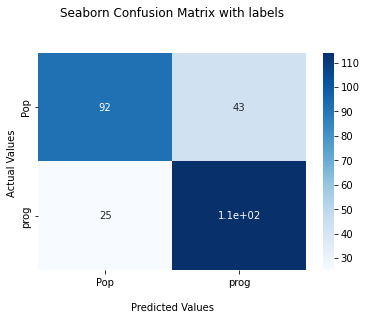

In [50]:
plot_confusion_matrix(y_test,y_pred_naive)

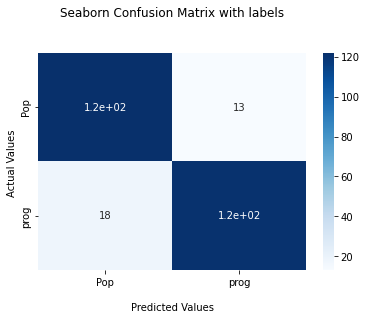

In [51]:
plot_confusion_matrix(y_test,y_pred_dt)

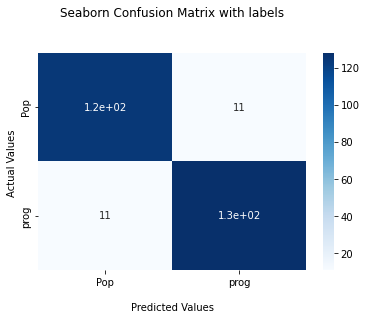

In [52]:
plot_confusion_matrix(y_test,y_pred_rf)

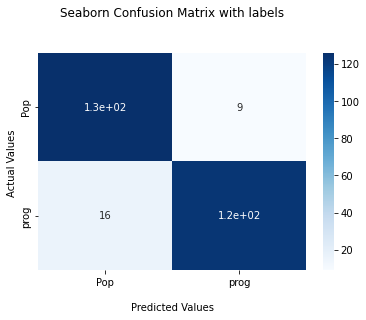

In [53]:
plot_confusion_matrix(y_test,y_pred_gbm)

<font size="4">The best algorithm according to Confusion Matrix is Random Forest</font>


Gökhan Kutay Civelek -090180352 <br>
Doğuhan Altın        -090180336